In [1]:
PATH="C:\\Users\\98gud\\Desktop\\paper\\open\\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import torch
import category_encoders as ce

In [2]:
train=pd.read_csv(PATH+"train.csv")
original=pd.read_csv(PATH+"train.csv")
test=pd.read_csv(PATH+"test.csv")
samle_submission=pd.read_csv(PATH+"sample_submission.csv")

In [3]:
display(train.head())

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

## 명목형 변수 인코딩

In [5]:
## 이진 변수와 멀티 클래스 변수로 구분
bi_cate=['gender','car','reality']
multi_cate=[x for x in train.select_dtypes(exclude=np.number) if x not in bi_cate]
del multi_cate[-1]

In [6]:
one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
train_bi=one_en.fit_transform(train[bi_cate])

C:\Users\98gud\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [7]:
train[bi_cate]=train_bi[[x+"_1" for x in bi_cate]]

In [8]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,1,1,1,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,1,1,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,0,0,0,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,1,1,0,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,1,0,0,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,1,1,1,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,1,1,0,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,1,0,1,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,0,1,0,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [9]:
one_en=ce.one_hot.OneHotEncoder(handle_missing="value")
train_multi=one_en.fit_transform(train[multi_cate])

C:\Users\98gud\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [10]:
train.drop(train[multi_cate],axis=1,inplace=True)
train[train_multi.columns]=train_multi

In [12]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email', 'occyp_type', 'family_size', 'begin_month', 'credit',
       'income_type_1', 'income_type_2', 'income_type_3', 'income_type_4',
       'income_type_5', 'edu_type_1', 'edu_type_2', 'edu_type_3', 'edu_type_4',
       'edu_type_5', 'family_type_1', 'family_type_2', 'family_type_3',
       'family_type_4', 'family_type_5', 'house_type_1', 'house_type_2',
       'house_type_3', 'house_type_4', 'house_type_5', 'house_type_6'],
      dtype='object')

In [14]:
train.shape

(26457, 37)

In [17]:
## 자 이제 하이라이트인 occupy는 어떻게 할 것인가? 일단 변수가 미치는 영향부터 보도록 하자


pd.crosstab(index=train['occyp_type'], columns=train['credit']).apply(lambda r: r/r.sum(), axis=1)

credit,0.0,1.0,2.0
occyp_type,,,
Accountants,0.130820,0.251663,0.617517
Cleaning staff,0.099256,0.230769,0.669975
Cooking staff,0.126915,0.240700,0.632385
Core staff,0.131141,0.235072,0.633787
Drivers,0.118730,0.227302,0.653968
HR staff,0.112903,0.064516,0.822581
High skill tech staff,0.118269,0.259615,0.622115
IT staff,0.195122,0.243902,0.560976
Laborers,0.129876,0.239805,0.630319


<BarContainer object of 18 artists>

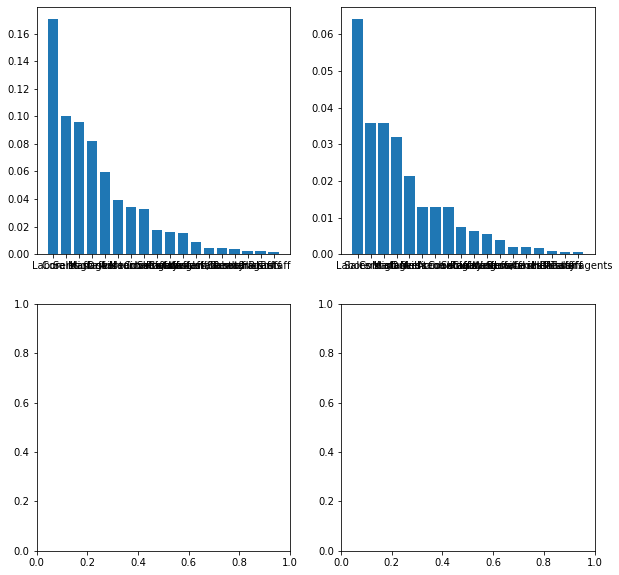

In [39]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0][0].bar(train['occyp_type'].value_counts().index,train['occyp_type'].value_counts()/train.shape[0])
axes[0][1].bar(test['occyp_type'].value_counts().index,test['occyp_type'].value_counts()/train.shape[0])

In [45]:
train.replace({'occyp_type':'HR staff'},{'occyp_type':1},inplace=True)
train.replace({'occyp_type':'IT staff'},{'occyp_type':-2},inplace=True)
train.replace({'occyp_type':'Waiters/barmen staff'},{'occyp_type':-1},inplace=True)

train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries', 1, -2,
       'Low-skill Laborers', -1], dtype=object)

In [50]:
occupation_miss=np.zeros(train.shape[0])
miss_index=train.loc[train['occyp_type'].isna()].index
occupation_miss[miss_index]=1
train['occyp_miss']=occupation_miss                 


In [59]:
train.loc[(train['occyp_type']!=1) &( train['occyp_type']!=-1) & (train['occyp_type']!=-2) ,['occyp_type']]=0

In [40]:
## EDA를 통해서 FLAG_MOBIL이 1의 값만 있다는 사실을 알았으므로 제거

train.drop(train[['FLAG_MOBIL']],axis=1,inplace=True)

## 이렇게 한 번 딥러닝으로 돌려봅시다

In [ ]:
train_deep=pd.to_numeric(train)

train_deeo.toTen